<a href="https://colab.research.google.com/github/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Modelagem_para_Diagn%C3%B3stico_de_Dados_Cl%C3%ADnicos_com_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagn√≥stico de Dados Cl√≠nicos com Machine Learning

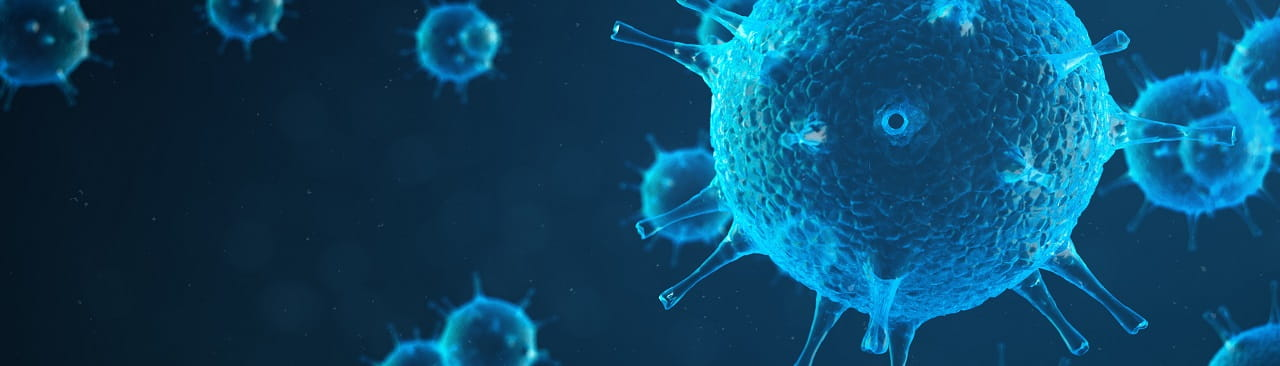

Bootcamp Data Science Alura

Autor: Rodrigo de Mendon√ßa 

<a href="https://www.linkedin.com/in/rodrigomendon√ßa/" alt="linkedin" target="_blank">
<img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=flat-square&logo=linkedin&logoColor=white">
</a>

<a href="mailto:<rodrigodemend@gmail.com>" alt="gmail" target="_blank">
<img src="https://img.shields.io/badge/-Gmail-FF0000?style=flat-square&labelColor=FF0000&logo=gmail&logoColor=white&link=mailto:<SEUEMAIL>" />
</a>

Este √© o projeto final do Bootcamp Data Science da Alura! Nele eu pude demonstrar todo o conhecimento adquirido durante o Bootcamp, aplicando em um caso real de dados disponibilizados pelo hospital S√≠rio-Liban√™s. O principal objetivo √© a constru√ß√£o de um modelo de machine learning capaz de detectar quais pacientes do hospital S√≠rio-Liban√™s que foram internados, ir√£o agravar seus casos e precisar√£o de leito de UTI.

## Descri√ß√£o do Problema

A pandemia do COVID-19 sobrecarregou o sistema de sa√∫de, que n√£o estava preparado para uma demanda t√£o grande de leitos de UTI, profissionais capacitados, equipamentos de prote√ß√£o individual, entre outros recursos. Com recursos escassos, ter em m√£os a previs√£o de quais pacientes ir√£o precisar utilizar esses recursos √© de suma import√¢ncia.

A partir do momento em que o paciente √© internado no hospital S√≠rio-Liban√™s, ele(a) ter√° o acompanhamento dos sinais vitais e ser√° submetido a exames de sangue. Unindo essas informa√ß√µes com as informa√ß√µes demogr√°ficas e grupo de doen√ßas pr√©vias do paciente, iremos prever se o paciente ir√° ter seu caso agravado e precisar√° utlizar leitos de UTI. Essa previs√£o deve ser o mais r√°pido poss√≠vel, dando tempo para que os recursos da UTI possam ser organizados ou a transfer√™ncia de pacientes possa ser agendada.

Agora que j√° temos ci√™ncia do problema que iremos resolver, vamos botar a m√£o na massa!!

# O que vou encontrar nesse Notebook

Este notebook tem como objetivo a modelagem do problema por meio de algoritmos de machine learning. Mas antes de criar modelos de machine learning, n√≥s iremos fazer uma explora√ß√£o dos dados e engenharia de atributos com o objetivo de buscar por poss√≠veis atributos que possa ajudar nosso modelo a diferenciar entre os pacientes que ir√£o para UTI e os que n√£o n√£o ir√£o. 

Al√©m de buscar por novos atributos escondidos nos dados, tamb√©m iremos ajustar as escalas para que nosso modelo n√£o de prefer√™ncia para um atributo apenas porque est√° em uma escala diferente dos demais.

Tamb√©m iremos fazer o balanceamento das classes utilizando uma t√©cnica conhecida como SMOTE. O balanceamento dos dados √© algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poder√° prever tudo para essa classe e mesmo assim ele ainda ter√° uma suposta boa avalia√ß√£o de performace.

Uma vez definidos os atributos que iremos treinar nosso modelo, vamos passar para uma etapa muito importante que √© a sele√ß√£o dos melhores atributos. Aqui, iremos reduzir significativamente a quantidade de atributos que nosso modelo ir√° utilizar para treinamento, aumentando a capacidade de generaliza√ß√£o do modelo e se tornando mais f√°cil para implementa√ß√£o em produ√ß√£o.

N√≥s iremos criar dois algoritmos de machine learning. O primeiro ser√° uma Regress√£o Log√≠stica, onde iremos fazer a sele√ß√£o dos melhores atributos, eliminando os atributos correlacionados e aplicando a t√©cnica do Step Backward Selection para selecionar apenas os atributos que s√£o importantes para a Regress√£o Log√≠stica.

Al√©m disso iremos tamb√©m trabalhar na otimiza√ß√£o dos hiperpar√¢metros e vamos fazer uma an√°lise nos dados de valida√ß√£o que nosso modelo errou, buscando por padr√µes que poderemos criar novos atributos que ajudar√£o nosso modelo a melhorar a performace.

Ap√≥s isso, iremos seguir os mesmos passos da cria√ß√£o do modelo da Regress√£o Log√≠stica para criar uma Floresta Aleat√≥ria. Ap√≥s a cria√ß√£o e otimiza√ß√£o dos dois modelos, iremos fazer uma compara√ß√£o entre eles a fim de escolher qual melhor se adequa para solucionar nosso problema.

# Bibliotecas

O primeiro passo em qualquer projeto de machine learning √© a importa√ß√£o das bibliotecas que ser√£o utilizadas no projeto.

N√≥s iremos utilizar bibliotecas comumente usadas em projeto de machine learning como pandas, numpy, sklearn, matplotlib, seaborn, etc.

## Bibliotecas Utilizadas

Aqui n√≥s temos a lista de todas as bibliotecas utilizadas nesse projeto e suas respectivas vers√µes:


*   pandas (V.1.1.5)
*   numpy (V.1.19.5)
*   matplotlib (V.3.2.2)
*   seaborn (V.0.11.2)
*   sklearn (V.1.0.2)
*   imblearn (V.0.8.1)
*   feature_engine (V.1.2.0)
*   mlxtend (V.0.14.0)
*   skopt (V.0.9.0)
*   joblib (V.1.1.0)

## Bibliotecas que n√£o vem por padr√£o no Google Colab

Aqui n√≥s temos algumas instala√ß√µes de bibliotecas que n√£o vem por padr√£o no Google Colab.

In [ ]:
# feature_engine
!pip install feature_engine

# scikit-optimize
!pip install scikit-optimize

# mlxtend
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

## Importa√ß√£o das Biblitecas

Como forma de organiza√ß√£o, separamos a importa√ß√£o das bibliotecas comentando para qual finalidade estamos importando aquela biblioteca.

In [ ]:
# Manipula√ß√£o dos Dados
import pandas as pd
import numpy as np

# Visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de vari√°veis categ√≥ricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Pr√© processamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from imblearn.over_sampling import SMOTENC

# Sele√ß√£o de Vari√°veis
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import SmartCorrelatedSelection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Valida√ß√£o 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# M√©tricas
from sklearn.metrics import roc_auc_score

# Otimiza√ß√£o de Hiperpar√¢metros
from skopt.plots import plot_convergence
from skopt import gp_minimize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Salvando os modelos
from joblib import dump, load

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Fun√ß√µes Utilizadas

Aqui, irei fazer a importa√ß√£o de um notebook tem como objetivo reunir todas as fun√ß√µes criadas durante o desenvolvimento do projeto. 

Criei um notebook separado para essas fun√ß√µes para que o projeto fique mais limpo e organizado.

Caso tenha interesse, √© poss√≠vel acessar o notebook clicando [aqui](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Funcoes_utilizadas.ipynb).

Clonando o reposit√≥rio.

In [ ]:
!git clone https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning

Rodando o notebook com as fun√ß√µes.

In [ ]:
%run '/content/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/Notebooks/Funcoes_utilizadas.ipynb'

# Importa√ß√£o dos Dados

Nesta se√ß√£o estamos fazendo a importa√ß√£o dos dados que ser√£o utilizados para a cria√ß√£o do modelo.

Os dados foram obtidos atrav√©s do [Kaggle](https://www.kaggle.com/S√≠rio-Libanes/covid19) onde o hospital S√≠rio-Liban√™s disponibilizou os dados mencionados acima de pacientes que j√° foram internados, contendo tanto pacientes que foram para UTI, quanto pacientes que n√£o agravaram seus casos e n√£o precisaram de leitos de UTI.

N√≥s temos as informa√ß√µes demogr√°ficas e grupo de doen√ßas pr√©vias do paciente, al√©m disso tamb√©m temos os sinais vitais e exames de sangue que est√£o sendo coletados em intervalos de 2 horas.

Por√©m, como queremos dar a informa√ß√£o se o paciente precisar√° de um leito de UTI o mais cedo poss√≠vel, iremos prever com base apenas nos sinais vitais e exames de sangue das primeiras duas horas do paciente no hospital, fazendo com que todos os profissionais do hospital fiquem cientes durante as primeiras duas horas ap√≥s a interna√ß√£o do paciente, se aquele paciente que est√£o atendendo ir√° precisar ou n√£o de um leito de UTI.

Afim de organizar melhor o projeto, os dados que utilizaremos foram importados e limpos neste [Notebook](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Importa√ß√£o_e_Limpeza_dos_Dados.ipynb) que se encontra nesse mesmo reposit√≥rio. Agora iremos importar os dados j√° limpos e pronto para an√°lise.

In [ ]:
# Importando dados limpos
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Cleaned/cleaned_data.csv',
                    sep =',')
# Visualizando os dados
dados.head()

AGE_ABOVE65 AGE_PERCENTIL  ...  OXYGEN_SATURATION_DIFF_REL  ICU
0            1          60th  ...                   -1.000000    1
1            0          10th  ...                   -0.961262    1
2            0          40th  ...                   -1.000000    0
3            0          10th  ...                   -0.980333    0
4            0          10th  ...                   -0.980129    0

[5 rows x 229 columns]

# Explora√ß√£o dos Dados e Engenharia de Atributos

Antes de pensar em criar um modelo preditivo, temos que primeiro fazer a engenharia de atributos que consiste em sua maioria de fazer uma an√°lise explorat√≥ria nos dados e buscar por poss√≠veis atributos que poderemos passar para nosso modelo aprender qual paciente ir√° para UTI e qual paciente n√£o ir√°.

Al√©m de buscar por novos atributos escondidos nos dados, tamb√©m iremos ajustar as escalas para que nosso modelo n√£o de prefer√™ncia para um atributo apenas porque est√° em uma escala diferente.


## Balaceamento dos Dados

Nosso projeto consiste em construir um modelo capaz de prever se um paciente internado no hospital S√≠rio-Liban√™s ir√° agravar seu caso e ir√° para a UTI ou se essa paciente n√£o precisar√° de UTI. Portanto, estamos trabalhando com um problema de classifica√ß√£o de 2 classes.

Com isso em mente, o balanceamento dos dados √© algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poder√° prever tudo para essa classe e mesmo assim ele ainda ter√° uma suposta boa avalia√ß√£o de performace.

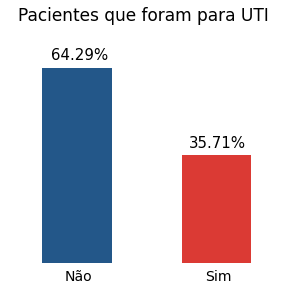

In [ ]:
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=round(dados['ICU'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 80)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "N√£o", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(dados['ICU'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['ICU'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 67, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 38, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 80,'Pacientes que foram para UTI', fontsize=17)
plt.show()

N√≥s temos praticamente 65% dos dados referentes a pacientes que n√£o foram para UTI e apenas 35% de pacientes que realmente foram para UTI. 

Com isso, vemos a necessidade de balancear os dados antes de entregar para um modelo de machine learning. 

Por√©m, iremos fazer esse balanceamentos apenas no momento certo, por enquanto vamos manter os dados originais para que possamos continuar com nossa an√°lise.

## Pacientes acima dos 65 anos

Vamos an√°lisar os pacientes que est√£o acima de 65 anos. O hospital S√≠rio-Liban√™s criou um atributo especificadamente para isso chamado AGE_ABOVE65.

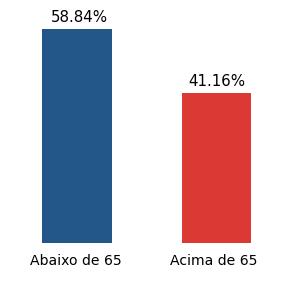

In [ ]:
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 65)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.34, -6.0, 'Abaixo de 65', fontsize=14)
plt.text(0.67, -6.0, 'Acima de 65', fontsize=14)
# Porcentagens
ICU_Nao = round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 61, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 43.32, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.show()

Temos 41% dos pacientes acima dos 65 anos, isso comprova que o virus est√° afetando principalmente a popula√ß√£o mais idosa.

In [ ]:
# Dicion√°rio para melhor visualiza√ß√£o dos dados
dict_grafico_age_above65 = {0:'N√£o', 1:'Sim'}
dict_grafico_ICU = {0:'N√£o', 1:'Sim'}

# Visualizando uma tabela cruzada
freq = pd.crosstab(dados['AGE_ABOVE65'].map(dict_grafico_age_above65), dados['ICU'].map(dict_grafico_ICU), rownames=['Acima dos 65'], colnames=['Foram para UTI?'])
freq['Percentual_que_foram_para_UTI(%)'] = round((freq['Sim'] / (freq['Sim'] + freq['N√£o']))*100,2)

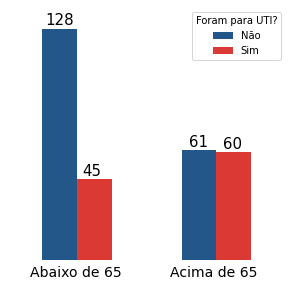

In [ ]:
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=freq[['N√£o', 'Sim']].plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 140)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.34, -9.0, 'Abaixo de 65', fontsize=14)
plt.text(0.67, -9.0, 'Acima de 65', fontsize=14)
# N√£o
Nao_Foram_para_UTI = freq['N√£o'][0]
Foram_para_UTI = freq['N√£o'][1]
plt.text(-0.225, Nao_Foram_para_UTI + 2.0, str(Nao_Foram_para_UTI), fontsize=15)
plt.text(0.8, Foram_para_UTI + 2.0, str(Foram_para_UTI), fontsize=15)
# Sim
Nao_Foram_para_UTI = freq['Sim'][0]
Foram_para_UTI = freq['Sim'][1]
plt.text(0.04, Nao_Foram_para_UTI + 2.0, str(Nao_Foram_para_UTI), fontsize=15)
plt.text(1.05, Foram_para_UTI + 2.0, str(Foram_para_UTI), fontsize=15)
# Titulo
plt.show()

Conseguimos ver que o fato do paciente ser acima de 65 n√£o diz muito se ele vai ou n√£o para a UTI pois 50% deles v√£o para UTI e 50% n√£o v√£o, por√©m o fato dele ter menos de 65 anos diz que ele tem grandes chances de n√£o ir. Portanto essa ser√° uma boa feature para nosso modelo.

Como esse atributo j√° est√° codificado, n√£o precisamos fazer nenhum tratamento antes de passar para o modelo.

## Percentil da Idade

Primeiramente, como esse atributo √© um atributo categ√≥rica ordinario, ou seja, a ordem importa, irei realizar o Label Encoder para que o modelo consiga ver a ordem de import√¢ncia desse atributo.

In [ ]:
# Instanciando o objeto
le = LabelEncoder()

# "Treinando" o label encoder
le.fit(dados['AGE_PERCENTIL'])

# Realizando o mapeamento do label encoder
dados['AGE_PERCENTIL_LE'] = le.transform(dados['AGE_PERCENTIL'])

# Visualizando o resultado do Encoding
pd.DataFrame({"AGE_PERCENTIL": dados['AGE_PERCENTIL'].unique(), 
              "AGE_PERCENTIL_LE": dados['AGE_PERCENTIL_LE'].unique()}).sort_values('AGE_PERCENTIL_LE')

AGE_PERCENTIL  AGE_PERCENTIL_LE
1          10th                 0
4          20th                 1
7          30th                 2
2          40th                 3
5          50th                 4
0          60th                 5
3          70th                 6
6          80th                 7
8          90th                 8
9    Above 90th                 9

Agora, vamos analisar um pouco mais a fundo como est√° distribuido os pacientes que foram ou n√£o para o ICU em rela√ß√£o a idade percentil.

In [ ]:
# Dicion√°rio para melhor visualiza√ß√£o dos dados
dict_grafico_ICU = {0:'N√£o', 1:'Sim'}
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['AGE_PERCENTIL'], dados['ICU'], rownames=['Percentil da Idade'], colnames=['UTI'])
# Criando uma coluna com a diferen√ßa entre pacientes que foram e que n√£o foram para ICU
freq['Foram_para_UTI_(%)'] = round(freq[1] / (freq[0] + freq[1]),2)*100
freq

UTI                  0   1  Foram_para_UTI_(%)
Percentil da Idade                            
10th                30   6                17.0
20th                31   7                18.0
30th                23  11                32.0
40th                25   8                24.0
50th                18  13                42.0
60th                17  11                39.0
70th                17  13                43.0
80th                12  14                54.0
90th                 8  12                60.0
Above 90th           8  10                56.0

Vamos visualizar o percentual de pacientes que foram para a UTI de uma forma gr√°fica:

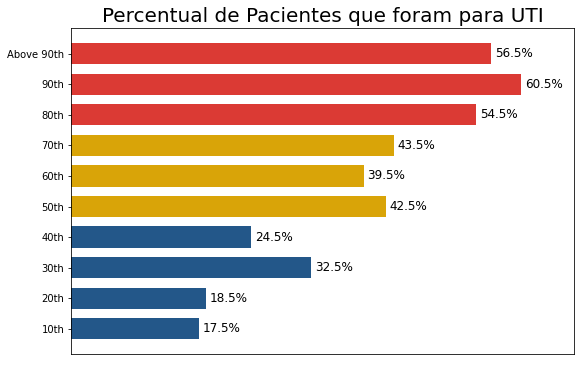

In [ ]:
# cores
cores = ['#235789', '#D9A408', '#DB3A34']
cores_lista = [cores[0],cores[0],cores[0], cores[0], cores[1], cores[1], cores[1], cores[2], cores[2], cores[2]]
# Criando o gr√°fico
fig, ax = plt.subplots(figsize=(9,6))
#bars = freq['Foram_para_UTI_(%)'].plot.barh(figsize=(9,6), color=cores_lista)
bars = ax.barh(freq.index, freq['Foram_para_UTI_(%)'], 0.7, color=cores_lista)
for bar in bars:
  width = bar.get_width()+0.5
  label_x = str(round(width,1))+str('%')
  label_y_pos = bar.get_y() + bar.get_height()/2
  ax.text(width, label_y_pos, s=label_x, va='center', fontsize=12)

# Ocultando valores no eixo x
ax.get_xaxis().set_visible(False)
# Delimitando eixo x
plt.xlim(0, 67)
# Apagando o eixo y
plt.ylabel('')
# Titulo
plt.title('Percentual de Pacientes que foram para UTI', fontsize=20)
plt.show()

Analisando o gr√°fico, podemos ver que dos 10th at√© os 40th a grande maioria dos pacientes n√£o v√£o para o ICU, portanto iremos agrupar essas categorias.

Seguindo o mesmo raciocinio tamb√©m vamos agrupar os pacientes de 50th at√© 70th e os pacientes de 80th at√© Above 90th.

In [ ]:
# Definindo o dicion√°rio de mapeamento
dict_group_map = {
    '10th': 0,
    '20th': 0,
    '30th': 0,
    '40th': 0,
    '50th': 1,
    '60th': 1,
    '70th': 1,
    '80th': 2,
    '90th': 2,
    'Above 90th': 2,
}

# Realizando o encoding da feature e gerando a nova feature AGE_PERCENTIL_LE_2
dados['AGE_PERCENTIL_LE_2'] = dados['AGE_PERCENTIL'].map(dict_group_map)

# Visualizando o resultado do Encoding
pd.DataFrame(list(dict_group_map.items()), columns=['AGE_PERCENTIL', 'AGE_PERCENTIL_LE_2'])

AGE_PERCENTIL  AGE_PERCENTIL_LE_2
0          10th                   0
1          20th                   0
2          30th                   0
3          40th                   0
4          50th                   1
5          60th                   1
6          70th                   1
7          80th                   2
8          90th                   2
9    Above 90th                   2

Como uma alternativa, podemos utilizar o m√©todo One Hot Encoding para criar uma coluna para cada categoria diferente dessa feature e poder passar essas informa√ß√µes de um outro √¢ngulo para nosso modelo.

In [ ]:
# Criando o One Hot Encoder para o AGE_PERCENTIL
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = onehotencoder.categories_[0].tolist()
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

10th  20th  30th  40th  50th  60th  70th  80th  90th  Above 90th
0     0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0         0.0
1     1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.0
2     0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0         0.0
3     1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.0
4     1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0         0.0
..    ...   ...   ...   ...   ...   ...   ...   ...   ...         ...
289   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0         0.0
290   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0         1.0
291   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0         0.0
292   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0         0.0
293   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0         0.0

[294 rows x 10 columns]

In [ ]:
# Criando o One Hot Encoder para o AGE_PERCENTIL_LE_2
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL_LE_2']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = ['AGE_PERCENTIL_LE_2_'+str(i) for i in onehotencoder.categories_[0].tolist()]
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

AGE_PERCENTIL_LE_2_0  AGE_PERCENTIL_LE_2_1  AGE_PERCENTIL_LE_2_2
0                     0.0                   1.0                   0.0
1                     1.0                   0.0                   0.0
2                     1.0                   0.0                   0.0
3                     1.0                   0.0                   0.0
4                     1.0                   0.0                   0.0
..                    ...                   ...                   ...
289                   1.0                   0.0                   0.0
290                   0.0                   0.0                   1.0
291                   0.0                   1.0                   0.0
292                   1.0                   0.0                   0.0
293                   0.0                   1.0                   0.0

[294 rows x 3 columns]

In [ ]:
# Visualizando n√∫mero de linhas e colunas de como nosso dataframe ficou
dados.shape

(294, 244)

Agora que criamos as novas colunas com o One Hot Encoding, vamos passar todas essas novas colunas para o tipo int64, para que n√£o se misturem no resto do processamento dos dados com as colunas que realmente s√£o do tipo float.

In [ ]:
# Selecionando asnovas colunas criadas pelo One Hot Encoding
col_float_to_int = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th', 'AGE_PERCENTIL_LE_2_0', 'AGE_PERCENTIL_LE_2_1', 'AGE_PERCENTIL_LE_2_2']

# Transformando as novas colunas criadas pelo One Hot Encoding em int64
for coluna in col_float_to_int:
  dados[coluna] = dados[coluna].astype('int64')


Ap√≥s a cria√ß√£o dessas novas features que ir√£o ajudar nosso modelo de previs√£o, vamos remover a coluna AGE_PERCENTIL, pois ela n√£o ser√° mais necess√°ria e j√° temos as informa√ß√µes dessa coluna nas duas features criadas.

In [ ]:
# Removendo a feature AGE_PERCENTIL uma vez que j√° criamos duas novas features a partir do encoding desta
dados = dados.drop(['AGE_PERCENTIL'], axis=1)

## G√™nero

Vamos visualizar se o g√™nero nos diz algo sobre o paciente ir para a UTI ou n√£o.

In [ ]:
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['GENDER'], dados['ICU'], rownames=['GENDER'], colnames=['ICU'])

Vamos visualizar apenas os pacientes do g√™nero 0:

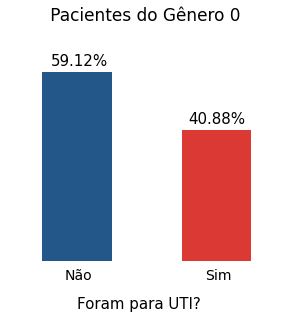

In [ ]:
# Visualizando apenas o g√™nero 0 em percentual (%)
gender_0 = (freq.loc[0,] / sum(freq.loc[0,])) * 100
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=round(gender_0, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 75)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "N√£o", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(gender_0, 2)[0]
ICU_Sim = round(gender_0, 2)[1]
plt.text(-0.185, ICU_Nao+2, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, ICU_Sim+2, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 75,'      Pacientes do G√™nero 0', fontsize=17)
plt.text(0, -15,'Foram para UTI?', fontsize=15)
plt.show()

Podemos ver que o paciente ser do g√™nero 0 diz que tem uma tend√™ncia maior a ir para UTI, pois os dados s√£o desbalanceados (65% n√£o v√£o e 35% v√£o para UTI) e os pacientes do g√™nero 0 fogem um pouco dessa propor√ß√£o tendendo a ir mais para a UTI.

Vamos visualizar apenas os pacientes do g√™nero 1:

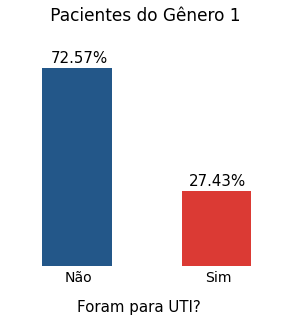

In [ ]:
# Visualizando apenas o g√™nero 0 em percentual (%)
gender_1 = (freq.loc[1,] / sum(freq.loc[1,])) * 100
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=round(gender_1, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 90)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "N√£o", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(gender_1, 2)[0]
ICU_Sim = round(gender_1, 2)[1]
plt.text(-0.185, ICU_Nao+2, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, ICU_Sim+2, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 90,'      Pacientes do G√™nero 1', fontsize=17)
plt.text(0, -17,'Foram para UTI?', fontsize=15)
plt.show()

Ao contr√°rio do g√™nero 0, n√≥s podemos ver que o g√™nero 1 tem uma pr√©-disposi√ß√£o menor a ir para a UTI, isso n√≥s diz que essa pode ser um atributo importante para nosso modelo conseguir diferenciar os pacientes.

## Grupos de Doen√ßas

Como primeiro passo, iremos criar uma nova feature que informar√° o modelo caso o paciente esteja em algum dos grupos de doen√ßa.

In [ ]:
# Criando uma nova feature que informa se o paciente est√° em algum grupo de doen√ßa
dados['Pacient_is_any_DISEASE_GROUPING'] = [1 if (dados['DISEASE GROUPING 1'][i] == 1 or dados['DISEASE GROUPING 2'][i] == 1 or dados['DISEASE GROUPING 3'][i] == 1 or dados['DISEASE GROUPING 4'][i] == 1 or dados['DISEASE GROUPING 5'][i] == 1) else 0 for i in range(len(dados))]

In [ ]:
# Criando uma tabela de frequencia
dict_map = {0:'N√£o', 1:'Sim'}
freq = pd.crosstab(dados['Pacient_is_any_DISEASE_GROUPING'].map(dict_map), dados['ICU'].map(dict_map), rownames=['Paciente Percente a Algum Grupo de Doen√ßas'], colnames=['Foram para UTI?'])
freq

Foram para UTI?                             N√£o  Sim
Paciente Percente a Algum Grupo de Doen√ßas          
N√£o                                         156   74
Sim                                          33   31

Quando olhamos para os pacientes que n√£o pertencem a nenhum grupo de doen√ßas, percebemos que todos seguem o mesmo padr√£o de 65% n√£o irem para a UTI e 35% que v√£o. Por√©m isso seria o resultado esperado uma vez que nossa base tamb√©m segue essa mesma propor√ß√£o onde 65% dos pacientes n√£o v√£o para UTI e 35% v√£o.

Olhando para os pacientes que pertencem a algum grupo de doen√ßas, podemos ver que temos algo mais perto do 50% - 50%, que nos diz que se o paciente pertence ao algum grupo de doen√ßas, ele ter√° mais chance de ir para na UTI.

## Tentando resolver a diferencia√ß√£o dos pacientes acima de 65 anos

Como seria muito importante nosso modelo conseguir diferenciar as pessoas acima de 65 anos que v√£o para UTI. Vamos ver se pela diferen√ßa de g√™nero nessa faixa et√°ria faz alguma diferen√ßa. Isso pode n√≥s ajudar a criar um atributo que pode ser muito preditiva para esses pacientes.

In [ ]:
# Visualizando uma tabela cruzada
pd.crosstab(dados['AGE_ABOVE65'].map(dict_map), dados['ICU'].map(dict_map), rownames=['Acima de 65 Anos'], colnames=['Foram para UTI?'])

Foram para UTI?   N√£o  Sim
Acima de 65 Anos          
N√£o               128   45
Sim                61   60

Como podemos ver na tabela acima, as pessoas acima de 65 anos tem praticamente 50% de chance de ir para a UTI.

Vamos tentar criar uma tabela de frequ√™ncia por g√™nero olhando apenas os pacientes acima de 65 anos:

In [ ]:
# Filtrando apenas os pacientes acima de 65 anos
dados_com_pacientes_acima_de_65 = dados[dados['AGE_ABOVE65'] == 1]
# Criando a tabela de frequ√™ncia
freq = pd.crosstab(dados_com_pacientes_acima_de_65['GENDER'], dados_com_pacientes_acima_de_65['ICU'].map(dict_map), rownames=['G√™nero'], colnames=['Foram para UTI?'])
freq

Foram para UTI?  N√£o  Sim
G√™nero                   
0                 34   38
1                 27   22

Como podemos ver o g√™nero n√£o seria um fator determinante nessa faixa et√°ria para saber se o paciente ir√° para a UTI ou n√£o.

Vamos agora testar se o paciente ir√° para UTI estando em algum grupo de doen√ßa e acima de 65 anos.

In [ ]:
freq = pd.crosstab(dados_com_pacientes_acima_de_65['Pacient_is_any_DISEASE_GROUPING'], dados_com_pacientes_acima_de_65['ICU'], rownames=['Paciente Percente a Algum Grupo de Doen√ßas'], colnames=['UTI'])
# Fazendo a tabela em termos percentuais em rela√ß√£o ao grupo com DISEASE GROUPING e ao grupo sem
salvando_resultado_Diasease_False = list((freq.loc[0,] / sum(freq.loc[0,])) * 100)
salvando_resultado_Diasease_True = list((freq.loc[1,] / sum(freq.loc[1,])) * 100)
freq = pd.crosstab(dados_com_pacientes_acima_de_65['Pacient_is_any_DISEASE_GROUPING'].map(dict_map), dados_com_pacientes_acima_de_65['ICU'].map(dict_map), rownames=['Paciente Percente a Algum Grupo de Doen√ßas'], colnames=['Foram para UTI?'])
freq.iloc[0,0] = salvando_resultado_Diasease_False[0]
freq.iloc[0,1] = salvando_resultado_Diasease_False[1]
freq.iloc[1,0] = salvando_resultado_Diasease_True[0]
freq.iloc[1,1] = salvando_resultado_Diasease_True[1]
freq = round(freq,2)
freq

Foram para UTI?                               N√£o    Sim
Paciente Percente a Algum Grupo de Doen√ßas              
N√£o                                         54.05  45.95
Sim                                         44.68  55.32

Podemos ver que agora conseguimos ver uma diferen√ßa. Os paciente acima de 65 anos que est√£o em algum dos grupos de doen√ßas, tem uma chance de 55% ir para ICU. Caso esse mesmo paciente n√£o estivesse em algum grupo de doen√ßa, ele teria apenas 45% de ir para a UTI.

Com essa informa√ß√£o em m√£os, vamos criar um novo atributo para que nosso modelo consiga visualizar essa informa√ß√£o de uma forma f√°cil.

In [ ]:
# Criando uma nova feature que informa se o paciente est√° em algum grupo de doen√ßa
dados['Pacient_is_any_DISEASE_GROUPING_and_Above_65'] = [1 if (dados['Pacient_is_any_DISEASE_GROUPING'][i] == 1 and dados['AGE_ABOVE65'][i] == 1) else 0 for i in range(len(dados))]

## Deixando todos os dados na mesma escala

Muitos algoritmos de machine learning pedem que os dados venham na mesma escala para terem a melhor performace. 

Pensando nisso vamos passar todos os dados para uma escala entre -1 e 1.

In [ ]:
# Ajustando escala das features que s√£o float e n√£o est√£o entre -1 e 1 previamente
dados = Ajustando_Escala(dados, ['AGE_PERCENTIL_LE', 'AGE_PERCENTIL_LE_2'])

# Ajustando os dados do tipo inteiro de [0 1] para [-1 1]
dados = Ajusta_Escala_Int(dados)

# Como iremos avaliar nosso Modelo

Para avaliar a performace do modelo, foi utilizada a t√©cnica de cross validation com 5 reparti√ß√µes. A afim de minimizar os efeitos da aleat√≥riedade, repetimos a t√©cnica de cross validation 10 vezes e fizemos uma m√©dia de seus resultados. Obtendo assim, uma valida√ß√£o robusta capaz de diminuir o overfitting e aumentar a generaliza√ß√£o dos modelos.


# Cria√ß√£o de uma Baseline


Antes de partir para modelo mais complexos e otimiza√ß√µes, iremos criar uma Regress√£o Log√≠stica b√°sica como baseline. 

Esse modelo √© importante para conseguirmos comparar se as melhorias que estamos fazendo nos nosso modelos est√£o surtindo efeito ou n√£o.

Para esse modelo b√°sico de regress√£o logistica, vamos passar todos os atributos que temos at√© o momento.

In [ ]:
# Cria√ß√£o de um modelo de regress√£o log√≠stica b√°sico com todos os atributos como baseline
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8703507630832047 - Intervalo: 0.8460129321150129 - 0.8946885940513964
AUC M√©dio de Teste: 0.7017360969992549 - Intervalo: 0.584522995613979 - 0.8189491983845307


Tivemos um resultado de 0.7015 com nosso modelo b√°sico da regress√£o l√≥g√≠stica. Vamos ver se conseguimos melhorar esse resultado com os pr√≥ximos passos.

# Balanceamento dos Dados com SMOTE

Como n√≥s discutimos anteriormente, o balanceamento dos dados √© algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poder√° prever tudo para essa classe e mesmo assim ele ainda ter√° uma suposta boa avalia√ß√£o de performace.

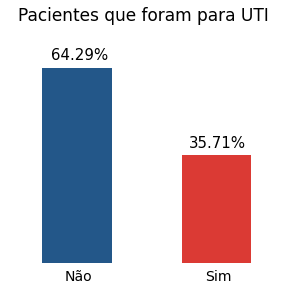

In [ ]:
# Visualizando gr√°ficamente o desbalanceamento dos dados
ax=round(dados['ICU'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 80)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "N√£o", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(dados['ICU'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['ICU'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 67, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 38, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 80,'Pacientes que foram para UTI', fontsize=17)
plt.show()

Como podemos ver, n√≥s temos praticamente 65% dos dados referentes a pacientes que n√£o foram para UTI e apenas 35% de pacientes que realmente foram para UTI. 

Com isso, vemos a necessidade de balancear os dados antes de entregar para um modelo de machine learning. 

Aplicando SMOTE para Balancear os Dados:

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True, smote_print=True)

Contagem de Classes Antes do SMOTE
0    189
1    105
Name: ICU, dtype: int64 

Contagem de Classes Depois do SMOTE
0    189
1    189
Name: ICU, dtype: int64 

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.9084329692372678 - Intervalo: 0.8914608876344836 - 0.925405050840052
AUC M√©dio de Teste: 0.8081417983080031 - Intervalo: 0.7170378921597527 - 0.8992457044562536


Nos dados de treino houve uma melhora, por√©m nada muito significante. Agora nos dados de teste tivemos um melhora muito significante ap√≥s aplicar a t√©cnica do SMOTE para balancear os dados.

Isso mostra como √© importante termos classes balanceadas para o algoritimo da Regress√£o Log√≠stica.

# Sele√ß√£o de Atributos B√°sica

Nesta se√ß√£o n√≥s iremos fazer uma sele√ß√£o de atributos b√°sica, retirando os atributos que s√£o quase constantes e duplicados.

Apesar de t√©cnicas b√°sicas, n√≥s iremos reduzir significativamente a quantidade de atributos que nosso modelo ir√° utilizar para treinamento, aumentando a capacidade de generaliza√ß√£o do modelo e se tornando mais f√°cil para implementa√ß√£o em produ√ß√£o.

### Atributos quase Constantes

Atributos que s√£o quase constantes n√£o trazem informa√ß√£o nenhuma relevante para nosso modelo, ent√£o podemos remov√™-los do nosso conjunto de dados.

Antes de fazer a remo√ß√£o dos atributos quase constantes, vamos ver a quantidade de atributos que nosso dataframe cont√©m:

In [ ]:
# Visualizando quantidade de atributos
dados.shape

(294, 245)

N√≥s contamos com 244 atributos no momento.

Agora, vamos ver quantos atributos s√£o quase constantes com uma toler√¢ncia de 99%:

In [ ]:
dados_sem_quasi_constants = Remove_Quasi_Constant_Features(dados, tol=0.99)

N√∫mero de Features Quase Constantes: 52 

Features que foram removidas
['ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF

Podemos ver que removemos um total de 52 features, ou seja, existinham 52 features que tinham 99% o mesmo valor.

Mas ser√° que a toler√¢ncia de 99% √© a ideal para selecionar quais as features com baixa vari√¢ncia (quasi-constants)?

Vamos criar um DataFrame comparativo para entender qual seria a toler√¢ncia que deveriamos escolher.

In [ ]:
df_resultados_remove_quasi_constant = Encontrando_Tolerancia_Features_Quasi_Cosntants(dados)
df_resultados_remove_quasi_constant

Toler√¢ncia  N¬∞ Features Removidas  AUC Treino  AUC Teste
0         0.99                     52    0.909725   0.810353
1         0.98                     64    0.909535   0.810821
2         0.97                     66    0.906276   0.806531
3         0.96                     66    0.906276   0.806531
4         0.95                     67    0.906093   0.811805
5         0.94                     67    0.906093   0.811805
6         0.93                     69    0.901441   0.811309
7         0.92                     69    0.901441   0.811309
8         0.91                     75    0.898080   0.807236
9         0.90                     77    0.888359   0.797152
10        0.89                     79    0.886443   0.794602
11        0.88                     82    0.869229   0.784796
12        0.87                     84    0.863764   0.781161
13        0.86                     84    0.863764   0.781161
14        0.85                     84    0.863764   0.781161

Escolhendo a toler√¢ncia de 95% pois √© a toler√¢ncia que temos a melhor generaliza√ß√£o do modelo.

In [ ]:
dados, _ = Remove_Quasi_Constant_Features(dados, tol=0.95)

N√∫mero de Features Quase Constantes: 67 

Features que foram removidas
['DISEASE GROUPING 2', 'DISEASE GROUPING 4', 'DISEASE GROUPING 6', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_MEDIAN', 'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_MEDIAN', 'PH_ARTERIAL_MEAN', 'PH_AR

Visualizando a quantidade de features restantes:

In [ ]:
dados.shape

(294, 178)

Podemos ver que reduzimos nosso conjunto de dados de 244 atributos para apenas 177 atributos, mas ser√° que perdemos performace?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.9060926748365145 - Intervalo: 0.8911600699796617 - 0.9210252796933672
AUC M√©dio de Teste: 0.8118054203788274 - Intervalo: 0.7312287143306913 - 0.8923821264269636


Na verdade, n√≥s aumentamos a performace do modelo que antes tinha um AUC de 0.8082 e agora temos um AUC de 0.8117, mesmo com 67 atributos a menos.

Isso nos demonstra que os atributos que s√£o quase constantes al√©m de n√£o trazer nenhuma informa√ß√£o relevante para o modelo, eles podemos atrapalhar a performace.

### Atributos Duplicados

Assim como os atributos quase constantes, os atributos duplicados tamb√©m podem prejudicar a performace do nosso modelo.

In [ ]:
dados, _ = Remove_Duplicated_Features(dados)

N√∫mero de Features Duplicadas: 87 

Features que foram removidas
{'DIMER_MEAN', 'SAT02_VENOUS_MIN', 'PH_VENOUS_MAX', 'SODIUM_MIN', 'UREA_MEAN', 'FFA_MAX', 'PLATELETS_MEAN', 'CREATININ_MAX', 'GGT_MEAN', 'HEMATOCRITE_MAX', 'LINFOCITOS_MAX', 'NEUTROPHILES_MIN', 'LINFOCITOS_MIN', 'PCR_MIN', 'SAT02_VENOUS_MAX', 'BIC_VENOUS_MIN', 'ALBUMIN_MAX', 'HEMATOCRITE_MIN', 'BE_VENOUS_MIN', 'SAT02_VENOUS_MEAN', 'LEUKOCYTES_MIN', 'PH_VENOUS_MEAN', 'TTPA_MEAN', 'PC02_VENOUS_MAX', 'HEMOGLOBIN_MIN', 'BILLIRUBIN_MEAN', 'CALCIUM_MIN', 'CALCIUM_MEAN', 'LINFOCITOS_MEAN', 'TGO_MEAN', 'TTPA_MIN', 'INR_MAX', 'ALBUMIN_MIN', 'GGT_MIN', 'FFA_MEAN', 'BIC_VENOUS_MAX', 'P02_VENOUS_MEAN', 'HEMOGLOBIN_MAX', 'CREATININ_MIN', 'LACTATE_MAX', 'CREATININ_MEAN', 'PLATELETS_MAX', 'GLUCOSE_MEAN', 'BILLIRUBIN_MIN', 'HEMOGLOBIN_MEAN', 'CALCIUM_MAX', 'LEUKOCYTES_MAX', 'TGO_MIN', 'PC02_VENOUS_MIN', 'TGO_MAX', 'POTASSIUM_MIN', 'BILLIRUBIN_MAX', 'PLATELETS_MIN', 'TGP_MAX', 'PC02_VENOUS_MEAN', 'TGP_MEAN', 'TTPA_MAX', 'FFA_MIN', 'NEUTR

In [ ]:
dados.shape

(294, 91)

N√≥s tinhamos 87 atributos duplicados na nossa base de dados. Com isso n√≥s passamos a ter 90 atributos remanecentes.

Mas como ser√° que ficou a performace do nosso modelo?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8985964027431852 - Intervalo: 0.883821756587228 - 0.9133710488991424
AUC M√©dio de Teste: 0.8200711237553342 - Intervalo: 0.740077143071615 - 0.9000651044390534


N√£o √© regra que removendo esses atributos a performace do modelo ir√° melhorar, geralmente o esperado √© que a performace se mantenha, por√©m com menos atributos.

Nesse caso n√≥s tivemos uma melhora, passando de AUC=0.8117 com 177 atributos para AUC=0.8200 com apenas 90 atributos. 

Aos poucos nosso modelo vai ganhando performace e melhor, dependendo de menos atributos, o que aumenta a generaliza√ß√£o do modelo e facilita a implementa√ß√£o em produ√ß√£o.

# Regress√£o Log√≠stica

A partir de agora iremos come√ßar uma nova se√ß√£o para a Regress√£o Log√≠stica.

Isso porque at√© ent√£o, os m√©todos b√°sicos de sele√ß√£o de atributos n√£o dependem muito do modelo que queremos treinar no final. Entretanto, os pr√≥ximos passos ir√£o afetar diretamente o treinamento do modelo. 

Ent√£o como queremos treinar uma Floresta Aleat√≥ria depois, precisamos fazer essa divis√£o, pois os melhores atributos que iremos selecionar no pr√≥ximo passo para a Regress√£o Log√≠stica, n√£o ser√° os mesmos que para a Floresta Aleat√≥ria.

## Tratando Atributos Correlacionados

Atributos correlacionados geralmente s√£o prejudiciais para a performace do modelo, fazendo com que um atributo com alto poder de predi√ß√£o, perca um pouco esse poder estando ao lado de outro atributo muito correlacionado a ele.

Quando fazemos t√©cnicas como One Hot Encoding, temos uma tend√™ncia muito grande a inserir diversos atributos correlacionados no nosso dataset. 

Al√©m disso, temos v√°rios atributos que foram feitos pelo time de Data Scince do hospital S√≠rio-Liban√™s que tem grande correla√ß√£o entre si. Uma prova disso √© que eles mesmos informaram para tomar cuidado com isso no discritivo do conjunto de dados.

Muitos dos atributos correlacionados j√° foram descartados nos processos de remo√ß√£o de atributos quase constantes e duplicados, por√©m pode haver outros que ainda n√£o foram descartados.

Bom, s√≥ tem uma maneira de descobrir isso, n√£o √© mesmo?

Vamos enfim, remover os atributos correlacionados da nossa base de dados:

In [ ]:
# Enable se pode executar a correla√ß√£o da Regress√£o Log√≠stica
enable_corr_rl = False

In [ ]:
# Regress√£o Log√≠stica
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rl:
  # Removendo as features correlacionadas
  dados_rl, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rl.to_csv('Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rl = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rl.shape

(294, 60)

Podemos ver que foram removidos 31 atributos.

O m√©todo que estamos utilizando, basicamente agrupa todos os atributos correlacionados acima de um limiar, nesse caso 80% (√© um par√¢metro que pode ser visto no notebook de fun√ß√µes clicando [aqui](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Funcoes_utilizadas.ipynb)). 

Ap√≥s esse agrupamento ele roda nosso algoritmo de machine learning com apenas 1 atributo por vez e escolhe o atributo que teve a melhor performace em cada um dos grupos dos atributos correlacionados. 

Por esse motivo que essa sele√ß√£o √© perfeita para a Regress√£o Log√≠stica (que foi o modelo passado para fazer essa sele√ß√£o), mas n√£o √© a melhor sele√ß√£o dos atributos para a Floresta Aleat√≥ria por exemplo.

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8950178316278833 - Intervalo: 0.8774900902810681 - 0.9125455729746985
AUC M√©dio de Teste: 0.8152238526615256 - Intervalo: 0.7210217933250249 - 0.9094259119980264


Dessa vez, nosso modelo perdeu um pouco de performace passando de AUC=0.8200 com 90 atributos, para AUC=0.8152 com 59 atributos.

O objetivo da sele√ß√£o de atributos n√£o √© inicialmente melhorar a performace do modelo, para isso n√≥s devemos "bolar" novas features e otimizar os hiperpar√¢metros do modelo. 

Como n√≥s diminuimos bem pouco a performace do modelo, vamos considerar como sucesso o objetivo de reduzir a quantidade de atributos que era o objetivo principal nesta etapa da cria√ß√£o do modelo.

## Sele√ß√£o de Atributos com Step Backward Selection

Como n√≥s gostamos de selecionar a menor quantidade de atributos para nosso modelo, mantendo a performace est√°vel, que tal remover mais alguns atributos que n√£o est√£o ajudando nosso modelo a performar melhor?

E agora, iremos utilizar uma das t√©cnicas mais performaticas de sele√ß√£o de atributos (pelo menos das que eu conhe√ßo ü§£). 

O Step Backward Selection basicamente ir√° rodar nosso modelo removendo apenas 1 atributo por vez, ou seja, como temos 60 atributos ele vai rodar 60 vezes tirando um atributo por vez. Ap√≥s isso, ele ir√° escolher o modelo que obteve o melhor desempenho.

Com isso, ap√≥s rodar o modelo retirando apenas 1 atributo por vez (fazendo uma esp√©cie de teste A/B) ele √© capaz de intuir qual o atributo mais irrelevante para nosso modelo.

Essa t√©cnica √© uma t√©cnica muito pesada computacionalmente pois precismos rodar nosso modelo diversas vezes, por isso fizemos v√°rias t√©cnicas de sele√ß√£o de atributos antes de aplicar essa. 

Apesar de muito pesada computacionalmente, essa t√©cnica promete selecionar exatamente as melhores features para o modelo espec√≠fico que est√° testando.

In [ ]:
# Enable se pode executar o Step Backward Selection da Regress√£o Log√≠stica
enable_step_backward_selection_LogisticRegression = False

In [ ]:
# Regress√£o Log√≠stica
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression()
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por n√∫mero de atributos: 

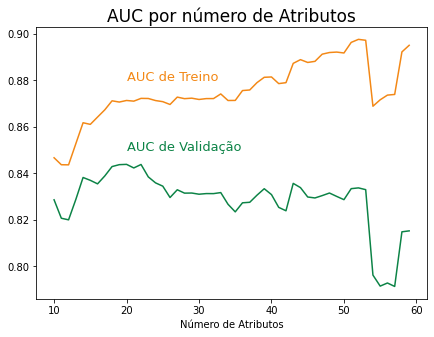

In [ ]:
# Visualizando o desempenho do modelo por n√∫mero de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rl.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gr√°fcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por n√∫mero de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('N√∫mero de Atributos')
# Label do eixo y
plt.ylabel('')
# Plotando texto
plt.text(20, 0.85, 'AUC de Valida√ß√£o', color=cor_teste, fontsize=13)
plt.text(20, 0.88, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

√â interessante ver como que ao retirar atributos, o AUC do treino cai enquanto o AUC da valida√ß√£o sobe.

Isso me leva a crer que os atributos que estavam sendo retirados estavam na verdade causando overfitting do modelo nos dados de treino. 

Uma vez que retiramos eles, nosso modelo consegue generalizar melhor e isso √© demonstrado com o valor de AUC de valida√ß√£o subindo.

Obviamente, existem atributos muito prediditos para nosso modelo e chega em um ponto que come√ßamos a remover justamente esses atributos, pois todos que rest√£o s√£o muito importantes. Isso occore quando caimos para menos de 20 atributos.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando vari√°vel target
features_selecionadas.append('ICU')

# N√∫mero de features
print(len(features_selecionadas))

21


No final do Step Backward Selection, n√≥s passamos de 59 atributos para apenas 20 atributos.

E a performace do modelo, como fica ap√≥s perder tudo isso de atirbutos?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8712907097795802 - Intervalo: 0.850338034656297 - 0.8922433849028635
AUC M√©dio de Teste: 0.8438118589503631 - Intervalo: 0.7567984642353206 - 0.9308252536654057


A performace melhorou!! Passando de AUC=0.8152 com 59 atributos para AUC=0.8438 com apenas 20 atributos.

N√£o falei que a t√©cnica era boa? S√≥ precisa ter paci√™ncia üòÜ.

Agora sim, estamos caminhando para um modelo cada vez mais robusto e com menos atributos.

In [ ]:
dados_rl = dados_rl[features_selecionadas].reset_index(drop=True)

## Otimiza√ß√£o de Hiperpar√¢metros

Chegou o momento de otimizar os hiperpar√¢metros. 

Como a Regress√£o Log√≠stica tem poucos par√¢metros para otimizar, vamos usar o GridSearchCV que ir√° testar todas as combina√ß√µes dos par√¢metros que eu passar para ele.

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl = False

if enable_GridSearchCV_rl:
  # Espa√ßo dos valores dos par√¢metros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimiza√ß√£o
      dados_rl, # Dados que iremos utilizar
      n_splits=5, # N√∫mero de slits do Cross Validation
      n_repeats=10, # N√∫mero de repeti√ß√µes que iremos fazer do Cross Validation
      smote=True, # Aplicando t√©cnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Dici√≥nario de range de par√¢metros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de par√¢metros
melhor_parametro_encontrado

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8851093615469313 - Intervalo: 0.8654299051793254 - 0.9047888179145372
AUC M√©dio de Teste: 0.8510900651343865 - Intervalo: 0.7689546653099625 - 0.9332254649588104


Ap√≥s o GridSearchCV achar a melhor combina√ß√£o dos hiperpar√¢metros, nosso modelo passou de AUC = 0.8438 para um AUC=0.8510.

N√£o foi uma melhora t√£o significativa assim, mas de pouco em pouco, nosso modelo vai se aperfei√ßoando e se a cada passo ele melhorar 1%, no final ele ter√° evoluido muito.

In [ ]:
# Temos um total de 20 atributos
dados_rl.shape

(294, 21)

## Buscando por Novos Atributos Preditivos

A fim de achar novas features preditivas, vamos dividir os dados em treino e valida√ß√£o para analisar os dados em que o modelo est√° errando nos dados de valida√ß√£o.

Vamos procurar por algum padr√£o que nosso modelo n√£o est√° conseguindo identificar e criar novas features apartir disso.

In [ ]:
# Dividindo os dados em treino e teste
x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(
  dados_rl.drop(['ICU'], axis=1), # Dados preditores (x)
  dados_rl['ICU'], # Dados alvo (y)
  test_size = 0.3, # Tamanho em (%) do conjunto de teste
  random_state = 1, # Seed (semente) para tornar o split reprodutivel
  stratify = dados_rl['ICU'] # Estratificando os dados para manter propor√ß√£o entre treino e teste
)

Aplicando a t√©cnica SMOTE para balanceamento das classes 

In [ ]:
# Selecionando as features categ√≥ricas (que s√£o as int64 nesse caso)
categorical_features = [True if x_train_rl[coluna].dtypes == 'int64' else False for coluna in x_train_rl.columns]
# Inst√¢nciando o SMOTE
sm = SMOTENC(categorical_features)
# Realizando o Balanceamento
x_train_rl, y_train_rl = sm.fit_resample(x_train_rl, y_train_rl)
x_test_rl, y_test_rl = sm.fit_resample(x_test_rl, y_test_rl)

Agora, vamos treinar o modelo da Regress√£o Log√≠stica e verificar se o resultado do AUC √© parecido com o que obtivemos quando estavamos fazendo o Cross Validarion.

In [ ]:
# Criando o modelo com os melhores par√¢metros achados no GridSearchCV
modelo_lr = LogisticRegression(**melhor_parametro_encontrado)
# Treinando o modelo
modelo_lr.fit(x_train_rl,y_train_rl)
# Obtendo as probabilidades do modelo
y_prob = modelo_lr.predict_proba(x_test_rl)
# Verificando o AUC para essa divis√£o de treino e teste
roc_auc_score(y_test_rl, y_prob[:,1])

0.8467220683287165

Podemos ver que o resultado est√° pr√≥ximo do obtivo de quando estavamos usando o cross validation.

Agora, vamos criar um dataframe para poder analisar os dados em que nosso modelo errou.

In [ ]:
# Prevendo as classes com nosso modelo para os dados de teste
ICU_hat = pd.DataFrame({'ICU_hat': modelo_lr.predict(x_test_rl)})
# Criando dataframe para fazer an√°lise
df_analise_modelo = pd.concat([x_test_rl, y_test_rl, ICU_hat], axis=1)
# Criando uma coluna indicando se o modelo errou ou acertou
df_analise_modelo['Modelo Acertou'] = ['Sim' if df_analise_modelo['ICU'][i] == df_analise_modelo['ICU_hat'][i] else 'N√£o' for i in range(len(df_analise_modelo))]
# Coluna auxiliar para fazer contagem
df_analise_modelo['Contagem'] = [1 for i in range(len(df_analise_modelo))]
# Visualizando o dataframe
df_analise_modelo

GENDER  OTHER  BIC_VENOUS_MEDIAN  ...  ICU_hat  Modelo Acertou  Contagem
0         1      1          -0.317073  ...        0             Sim         1
1        -1      1          -0.317073  ...        1             Sim         1
2        -1     -1          -0.317073  ...        1             Sim         1
3        -1      1          -0.317073  ...        0             Sim         1
4        -1     -1          -0.317073  ...        1             N√£o         1
..      ...    ...                ...  ...      ...             ...       ...
109      -1      1          -0.317073  ...        1             Sim         1
110      -1      1          -0.365854  ...        1             Sim         1
111      -1      1          -0.317073  ...        1             Sim         1
112      -1      1          -0.342347  ...        1             Sim         1
113      -1      1          -0.317073  ...        1             Sim         1

[114 rows x 24 columns]

Vamos tentar entender se para os dados que nosso modelo errou na valida√ß√£o, existe uma distribui√ß√£o diferente (para os dados do tipo n√∫merico) nos pacientes que foram para a UTI, dos pacientes que n√£o foram.

Como s√£o muitos atirbutos, vamos agrupar e visualizar a m√©dia:

In [ ]:
# Filtrando apenas os dados que o nosso modelo errou nos dados de teste
df_analise_modelo_errou = df_analise_modelo[df_analise_modelo['Modelo Acertou'] == "N√£o"]

# M√°scara com colunas n√∫mericas
colunas_numericas = list(df_analise_modelo_errou.select_dtypes(include='float64').columns)
colunas_numericas.append('ICU')

# Dataframe com apenas as colunas n√∫mericas
df_analise_modelo_errou_numericas = df_analise_modelo_errou[colunas_numericas]

# Agrupando por paciente que foi na ICU ou n√£o e tirando a m√©dia do restante
features_numericas_agrupadas = df_analise_modelo_errou_numericas.groupby(['ICU']).agg('mean')
features_numericas_agrupadas

BIC_VENOUS_MEDIAN  ...  TEMPERATURE_DIFF_REL
ICU                     ...                      
0            -0.274390  ...             -0.965816
1            -0.395122  ...             -0.995366

[2 rows x 11 columns]

Para alguns atributos n√£o muda muito, mas para outros a diferen√ßa √© muito grande da m√©dia. Portanto, vamos criar novos atributos tentando ajudar nosso modelo a enxengar essa diferen√ßa.

Vamos criar atributos categ√≥ricos que ir√£o dizer se aquele atributo em si est√° acima ou abaixo da m√©dia entre os valores obtidos na tabela agrupada acima.

In [ ]:
# Copia dos dados
dados_rl_teste_nova_feature = dados_rl.copy()

# Dicion√°rio com os pontos de corte 
dict_corte_features_numericas = {}

# Loop para adicionar uma feature categorica das features n√∫mericas
# Essa feature faz uma compara√ß√£o se a feature n√∫meria est√° acima ou n√£o da m√©dia que
# diferencia ela nos dados de teste onde nosso modelo tinha errado previamente
for feature_numerica in features_numericas_agrupadas.columns:
  # Cria√ß√£o das features n√∫mericas
  dados_rl_teste_nova_feature['feature_cat_'+str(feature_numerica)] = [1 if dados_rl_teste_nova_feature[feature_numerica][i] > features_numericas_agrupadas[feature_numerica].mean() else -1 for i in range(len(dados_rl_teste_nova_feature))]
  # Adicionando os pontos de corte no dicion√°rio
  dict_corte_features_numericas[feature_numerica] = features_numericas_agrupadas[feature_numerica].mean()

# Rodando o modelo com as novas features
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)


Resultados Alcan√ßados
AUC M√©dio de Treino: 0.9084349947716974 - Intervalo: 0.8910358890482419 - 0.9258341004951529
AUC M√©dio de Teste: 0.8581942052856181 - Intervalo: 0.7777364240994106 - 0.9386519864718256


Obtivemos um resultado pouco superior ao modelo que tinhamos antes de adicionar esses atributos, passando de AUC=0.8510 para AUC=0.8581.

Isso quer dizer ent√£o que adicionar esses atributos n√£o foi uma boa escolha e devemos retir√°-los? Na verdade, podemos ter atributos correlacionados e duplicados que possam estar prejudicando a performace do nosso modelo.

In [ ]:
# Resultado Salvo
dict_corte_features_numericas = {'BIC_VENOUS_MEDIAN': -0.33521929964248254,
                                'BLOODPRESSURE_DIASTOLIC_MEDIAN': -0.010925167678150431,
                                'BLOODPRESSURE_SISTOLIC_DIFF_REL': -0.9885026145125,
                                'CALCIUM_MEDIAN': 0.32091836725,
                                'CREATININ_MEDIAN': -0.9020078086485521,
                                'DIMER_MEDIAN': -0.9435929416174114,
                                'INR_MEDIAN': -0.9460984995323078,
                                'LACTATE_MEDIAN': 0.577205980875,
                                'LINFOCITOS_MEDIAN': -0.786087293397154,
                                'PCR_MEDIAN': -0.7743132656512662,
                                'TEMPERATURE_DIFF_REL': -0.9805908807625}

In [ ]:
dados_rl_teste_nova_feature.shape

(294, 32)

Podemos ver que agora passamos de 20 atributos para 31 atributos.

Como n√£o s√£o muitos, vamos aplicar a t√©cnica do Step Backward Selection a fim de reduzir essa quantidade de atributos.

### Step Backward Selection

Vamos ent√£o aplicar a t√©cnica do Step Backward Selection para tentar reduzir a quantidade de atributos e ver se nosso modelo melhora ou n√£o de performace.

In [ ]:
# Enable se pode executar o Step Backward Selection da Regress√£o Log√≠stica
enable_step_backward_selection_LogisticRegression_2 = False

In [ ]:
# Regress√£o Log√≠stica
modelo = LogisticRegression(**melhor_parametro_encontrado)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression_2:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl_teste_nova_feature, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression_2:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression(**melhor_parametro_encontrado)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl_teste_nova_feature, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por n√∫mero de atributos:

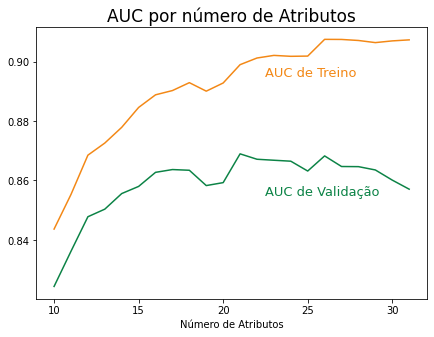

In [ ]:
# Visualizando o desempenho do modelo por n√∫mero de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rl_teste_nova_feature.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gr√°fcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por n√∫mero de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('N√∫mero de Atributos')
# Label do eixo y
plt.ylabel('')
# Plotando texto
plt.text(22.5, 0.855, 'AUC de Valida√ß√£o', color=cor_teste, fontsize=13)
plt.text(22.5, 0.895, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

Podemos ver o modelo teve uma pequena melhora de 31 at√© 21 atributos, aumentando um pouco o AUC de valida√ß√£o e diminuindo o AUC de treino. 

Nesse trecho nosso modelo estava diminuindo o overfitting dos dados de treino e conseguindo generalizar mais.

Por√©m ao passar de 21 atributos, come√ßou a remover alguns atributos importantes e nosso modelo come√ßou a perder poder preditivo tamb√©m.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl_teste_nova_feature.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando vari√°vel target
features_selecionadas.append('ICU')

# N√∫mero de features
print(len(features_selecionadas))

22


Podemos ver que agora nos sobrou apenas 21 atributos, reduzindo um total de 10 atributos.

Vamos ver a performace do modelo com esses 21 atributos:

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.8994078976222188 - Intervalo: 0.8827030386553152 - 0.9161127565891225
AUC M√©dio de Teste: 0.8691843228269821 - Intervalo: 0.794894288030415 - 0.9434743576235493


Aumentamos nosso AUC de 0.8581 para 0.8691 ap√≥s a sele√ß√£o dos atributos.

Considerando que al√©m disso reduzimos 10 atributos do nosso modelo, podemos considerar como uma √≥tima melhoria.

In [ ]:
dados_rl_teste_nova_feature = dados_rl_teste_nova_feature[features_selecionadas].reset_index(drop=True)

## Otimiza√ß√£o de Hiperpar√¢metros com Novos Atributos

Vamos ent√£o para finalizar nosso modelo de Regress√£o Log√≠stica, otimizar novamente os hiperpar√¢metros com o GridSearchCV:

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl_2 = False

if enable_GridSearchCV_rl_2:
  # Espa√ßo dos valores dos par√¢metros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimiza√ß√£o
      dados_rl_teste_nova_feature, # Dados que iremos utilizar
      n_splits=5, # N√∫mero de slits do Cross Validation
      n_repeats=10, # N√∫mero de repeti√ß√µes que iremos fazer do Cross Validation
      smote=True, # Aplicando t√©cnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Dici√≥nario de range de par√¢metros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de par√¢metros
melhor_parametro_encontrado

{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.9041019265083017 - Intervalo: 0.8878073718433005 - 0.9203964811733029
AUC M√©dio de Teste: 0.8682230291233062 - Intervalo: 0.7976995176477658 - 0.9387465405988465


Ap√≥s a adi√ß√£o dos novos atributos e fazendo a sele√ß√£o novamente, aumentamos 1 atributo ao total do nosso modelo e conseguimos aumentar a performace do AUC dele em mais ou menos 1,5% tamb√©m.

Portanto iremos manter essa troca, visto que chegamos no melhor modelo que conseguimos para a Regress√£o Log√≠stica.

In [ ]:
# Temos um total de 21 atributos
dados_rl_teste_nova_feature.shape

(294, 22)

# Floresta Aleat√≥ria

Para n√£o dizer que ficamos apenas com a Regress√£o Log√≠stica, vamos agora testar a Floresta Aleat√≥ria com nosso conjunto de dados.

Por√©m, iremos voltar na sele√ß√£o de atributos correlacionados pois como eu havia mencionado, apartir desse ponto n√≥s estamos otimizando para um modelo espec√≠fico e os atributos selecionados para a Regress√£o Log√≠stica podem n√£o ser os mesmos que a Floresta Aleat√≥ria selecionaria.

## Tratando Atributos Correlacionados

Pois ent√£o, vamos dar inicio a sele√ß√£o de atributos correlacionados para a Floresta Aleat√≥ria:

In [ ]:
# Enable se pode executar a correla√ß√£o da Random Forest
enable_corr_rf = False

In [ ]:
# Floresta Aleat√≥ria
modelo = RandomForestClassifier(n_estimators=200)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rf:
  # Removendo as features correlacionadas
  dados_rf, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rf.to_csv('Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rf = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rf.shape

(294, 60)

Podemos ver que nesse momento foram selecionados 59 atributos.

Essa foi a mesma quantidade selecionada pela Regress√£o Log√≠stica, que obviamente faz sentido pois o algoritmo primeiro agrupa os atributos em grupos correlacionados e ap√≥s isso usa o modelo para selecionar um por grupo.

Apesar do n√∫mero de atributos serem os mesmo, n√£o quer dizer que a Floresta Aleat√≥ria tenha selecionado os mesmos que a Regress√£o Log√≠stica tinha selecionado anteriormente.

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 1.0 - Intervalo: 0.9999999999999999 - 1.0
AUC M√©dio de Teste: 0.8816090813805495 - Intervalo: 0.8025202364043496 - 0.9606979263567494


Podemos ver que nossa Floresta Aleat√≥ria j√° conseguiu um AUC de 0.8816, batendo j√° o melhor resultado que a Rgress√£o Log√≠stica tinha conseguido que era um pouco menos de 0.87.

## Sele√ß√£o de Atributos com Step Backward Selection

Vamos agora aplicar a t√©cnica Step Backward Selection para selecionar os melhores atributos para a Floresta Aleat√≥ria, uma vez que nesse momento, temos um total de 59 atributos.

In [ ]:
# Enable se pode executar o Step Backward Selection da Random Forest
enable_step_backward_selection_RandomForest = False

In [ ]:
# Floresta Aleat√≥ria
modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_RandomForest:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rf, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_RandomForest:
  # Achando os melhores resultados do Step Backward Selection
  modelo = RandomForestClassifier(n_estimators=200)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rf, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por n√∫mero de atributos:

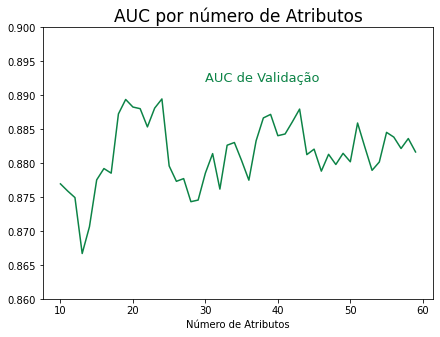

In [ ]:
# Visualizando o desempenho do modelo por n√∫mero de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rf.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gr√°fcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
#sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por n√∫mero de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('N√∫mero de Atributos')
# Label do eixo y
plt.ylabel('')
plt.ylim(0.86, 0.90)
# Plotando texto
plt.text(30, 0.892, 'AUC de Valida√ß√£o', color=cor_teste, fontsize=13)
#plt.text(22.5, 0.895, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

Aqui n√£o faz sentido plotar a compara√ß√£o com o AUC de Treino pois a Floresta Aleat√≥ria se mant√©m com o AUC de treino sempre em 1.

Sobre o AUC de valida√ß√£o, n√≥s podemos ver que √© bem oscilat√≥rio. Em alguns periodos parece que o modelo est√° generalizando mais, como no trecho de 50 at√© 45 atributos. 

Por√©m logo ap√≥s ele perde algum atributo importante e come√ßa a cair a performace novamente.

Podemos observar que o tipo ocorre perto dos 25 atributos, apartir dai o modelo fica est√°vel por alguns atributos e ap√≥s come√ßa a cair novamente.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rf.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando vari√°vel target
features_selecionadas.append('ICU')

# N√∫mero de features
print(len(features_selecionadas))

25


Ap√≥s a sele√ß√£o do Step Backward Selection, obtivemos um total de 24 atributos, reduzindo um total de 35 atributos.

E como ficou a performace do nosso modelo agora com apenas esses 24 atributos?

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 1.0 - Intervalo: 0.9999999999999999 - 1.0
AUC M√©dio de Teste: 0.889413041850715 - Intervalo: 0.817256127994982 - 0.961569955706448


Nossa Floresta Aleat√≥ria passou de AUC=0.8816 com 59 atributos, para AUC=0.8894 com apenas 24 atributos. 

Com isso, podemos ver que houve uma pequena melhora na performace do modelo, por√©m o grande ganho aqui foi ter diminu√≠do 35 features do nosso modelo.

In [ ]:
dados_rf = dados_rf[features_selecionadas].reset_index(drop=True)

In [ ]:
# Visualizando que temos apenas 24 atributos
dados_rf.shape

(294, 25)

## Otimiza√ß√£o de Hiperpar√¢metros

Por fim, vamos otimizar os hiperpar√¢metros da nossa Floresta Aleat√≥ria.

Como s√£o um n√∫mero grande de par√¢metros, se fossemos usar o GridSearchCV iria demorar muito tempo. Portanto iremos utilizar o RandomizedSearchCV.

### RandomizedSearchCV
Fazendo a busca aleat√≥ria no nosso espa√ßo de par√¢metros:

In [ ]:
enable_RandomizedSearchCV_RandomForest = False

if enable_RandomizedSearchCV_RandomForest:
  # Espa√ßo dos valores dos par√¢metros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
      'min_samples_leaf' : [2, 3, 5, 8, 13, 21, 34, 55],
      'min_samples_split' : [2, 3, 5, 8, 13, 21, 34, 55],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Rodando o RandomizedSearchCV
  modelo = RandomForestClassifier()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_RandomizedSearchCV(
      modelo, # Modelo que iremos fazer a otimiza√ß√£o
      dados_rf, # Dados que iremos utilizar
      n_splits=5, # N√∫mero de slits do Cross Validation
      n_repeats=10, # N√∫mero de repeti√ß√µes que iremos fazer do Cross Validation
      espaco_de_parametros=espaco_de_parametros, # Dici√≥nario de range de par√¢metros
      n_iter=100, # N√∫mero de itera√ß√µes 
      smote=True) # Aplicando t√©cnica SMOTE para balancear os dados
  
  # Melhor par√¢metro encontrado
  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  # Melhor resultado salvo
  melhor_parametro_encontrado = {'bootstrap': True,
                                'criterion': 'gini',
                                'max_depth': 100,
                                'max_features': 'auto',
                                'max_samples': 0.9,
                                'min_samples_leaf': 2,
                                'min_samples_split': 2,
                                'n_estimators': 600}

# Visualizando o melhor conjunto de par√¢metros
melhor_parametro_encontrado

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
# Visualizando o resultado com o melhor conjunto de par√¢metros encontrado
modelo = RandomForestClassifier(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 0.9998529554336258 - Intervalo: 0.9995464135389702 - 1.0001594973282815
AUC M√©dio de Teste: 0.8822336602530509 - Intervalo: 0.8103032747506925 - 0.9541640457554094


Como podemos ver, a busca aleat√≥ria n√£o achou nenhum par√¢metro que melhorasse a performace do modelo. Na verdade nosso modelo perdeu performace passando de um AUC de 0.8894 para 0.8823. 

Visto isso, n√£o iremos continuar com os par√¢metros encontrados pela RandomizedSearchCV e vamos voltar para os par√¢metros que estavam previamente.

### Otimizando um par√¢metro por vez

A fim de buscar outra forma de otimizar os hiperpar√¢metros da Floresta Aleat√≥ria, vamos otimizar um par√¢metro por vez.

Vai funcionar da seguinte maneira: Primeiro vamos escolher 1 par√¢metro e rodar o modelo 1 vez com todas as possibilidades desse par√¢metro. Ap√≥s isso vamos selecionar o par√¢metro que obteve a melhor performace e vamos partir para a otimiza√ß√£o do segundo par√¢metro.

Vamos ver se assim n√≥s iremos encontrar uma combina√ß√£o de par√¢metros mais eficiente que a anterior. 

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_otimiza_hiperparametro = False

if enable_otimiza_hiperparametro:
  # Espa√ßo de par√¢metros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'min_samples_leaf' : [1, 2, 3, 5],
      'min_samples_split' : [2, 3, 5],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Otimizando um par√¢metro por vez
  param_dict = Otimiza_um_por_vez(dados_rf, espaco_de_parametros)

else:
  param_dict = {'bootstrap': False,
                'criterion': 'gini',
                'max_features': 'auto',
                'min_samples_leaf': 1,
                'min_samples_split': 2,
                'n_estimators': 1000}

# Visualizando o melhor conjunto de par√¢metros
param_dict

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
# Visualizando o resultado com o melhor conjunto de par√¢metros encontrado
modelo = RandomForestClassifier(**param_dict)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcan√ßados
AUC M√©dio de Treino: 1.0 - Intervalo: 1.0 - 1.0
AUC M√©dio de Teste: 0.903536909485663 - Intervalo: 0.8468063486087357 - 0.9602674703625903


Podemos ver que encontramos uma combina√ß√£o de par√¢metros que melhorou a performace do nosso modelo.

Passamos de um AUC de 0.8894 para 0.9035 com a nova combina√ß√£o dos par√¢metros.

Isso com apenas 24 atributos.

In [ ]:
# Visualizando que temos 24 atributos.
dados_rf.shape

(294, 25)

# Considera√ß√µes Finais

Podemos concluir que as t√©cnicas implementadas de sele√ß√£o de atributos obtiveram um sucesso consider√°vel, uma vez que o objetivo com esse tipo de t√©cnica √© reduzir o n√∫mero de atributos do nosso modelo. 

Al√©m disso conseguimos ver que por muitas vezes os atributos em excesso prejudicam a generaliza√ß√£o dos modelos.

Obtivemos os seguintes resultados de AUC:

*   Regress√£o Log√≠stica: 0.8681 com 21 atributos.
*   Floresta Aleat√≥ria: 0.9035 com 24 atributos.


# Trabalhos Futuros


Obtivemos bons resultados ap√≥s toda a otimiza√ß√£o dos modelos, por√©m na √°rea da sa√∫de n√≥s devemos ter modelos muito precisos. Acredito que nossa Regress√£o Log√≠stica e nossa Floresta Aleat√≥ria poderiam ser muito √∫teis na cria√ß√£o de ensembles para tentar chegar em um AUC cada vez melhor. Assim como testar outros algoritmos como SVM e KNN a fim de olhar por outros √¢ngulos para o problema, podendo trazer um poder preditivo diferente.
